# DAT540 Project - What will be the price of this stock?

**Course:** Introduction to Data Science

The goal of this project is to analyze the dataset representing stock prices and explore various approaches to data preprocessing. Additionally, we aim to identify the potential insights that can be extracted from the data.


In [ ]:
# necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# loading the datasets
fundamentals = pd.read_csv('fundamentals.csv', sep=',')
prices = pd.read_csv('prices.csv', sep=',')
securities = pd.read_csv('securities.csv', sep=',')
prices_split_adjusted = pd.read_csv('prices-split-adjusted.csv', sep=',')


## What is dataset about?

The dataset used in this analysis is sourced from Kaggle and is available at: Kaggle NYSE Dataset. This dataset contains historical data from the New York Stock Exchange (NYSE), including stock prices and financial information for various companies over multiple years. It provides a comprehensive view of market trends, company performance, and price fluctuations over time. This description is based on the information provided by the dataset authors.

**Context**

This dataset is a playground for fundamental and technical analysis. It is said that 30% of traffic on stocks is already generated by machines, can trading be fully automated? If not, there is still a lot to learn from historical data.

**Content**

Dataset consists of following files:

prices.csv: raw, as-is daily prices. Most of data spans from 2010 to the end 2016, for companies new on stock market date range is shorter. There have been approx. 140 stock splits in that time, this set doesn't account for that.

prices-split-adjusted.csv: same as prices, but there have been added adjustments for splits.

securities.csv: general description of each company with division on sectors

fundamentals.csv: metrics extracted from annual SEC 10K fillings (2012-2016), should be enough to derive most of popular fundamental indicators.

**Acknowledgements**

Prices were fetched from Yahoo Finance, fundamentals are from Nasdaq Financials, extended by some fields from EDGAR SEC databases.


This dataset consists of four distinct files, each capturing different aspects of stock market data, as described earlier. In the following exploratory analysis, we will go trhrough each of these files in greater detail, discussing the types of data they contain and the potential challenges that may arise during data preprocessing. The exploration will focus on understanding the structure of the data, identifying missing or inconsistent values, and addressing issues related to data normalization and integration.

## Exploration Analysis

In the following section, we will focus on exploring the dataset and identifying the key information required for data preprocessing and model development.

This dataset consists of four different files:

* fundamentals.csv
* price-split-adjusted.csv
* prices.csv
* securities.csv

In the following sections, we will go through each of the files in the dataset and analyze fundamental aspects of the data that are crucial for accurate preprocessing. The main areas will be:

* shape of dataset
* data types
* structure of files
* searching for duplicates
* searching for missing values
* searching for outliers
* data distribution



Recommendations from this analysis will be summarized at the end of the section.




### First look at the dataset

The following section provides an overview of the dataset. The code, presented in multiple cells below, displays examples of the data, returns basic statistics, and examines the number of numerical and categorical values present.

**Dataset Overview**

We begin by reviewing the dataset ans each files it contains. Notably, the "fundamentals" file contains significantly more columns than the other files. These columns summarize annual performance data for companies and offer insights into their success in the market. The "prices" and "prices_split_adjusted" files share a similar layout. As mentioned in the dataset description, the "prices_split_adjusted" file includes adjustments for stock splits, making it more suitable for analysis. Therefore, we will more focus on the "prices_split_adjusted". The "securities" file than contains some additional information about companies, such an industry they belong, the location of headquarter or date of establishment.

**Data Types**

We also discovered how many categorical and numerical variables are present in each dataset file, which helps us determine whether encoding or scaling will be necessary during preprocessing. Generaly we can say, that most of the column have numerical character.

For the "prices_split_adjusted" file, most of the values are numerical, representing stock performance. However, there are non-numerical columns, such as the company name and the date of the stock record. The numerical columns represent key stock attributes, such as the stock's opening price (open), closing price (close), minimum value of the day (low), maximum value of the day (high), and volume traded.

A similar situation is observed for the "fundamentals" file, where most values are numerical, with the exception of company name and date.

On the other hand, the "securities" file, is different, as most of the values are non-numerical and represent various details about the companies

**Shape of the Dataset tabels**

Additionally, we went through the shapes of the datasets, and summarized in the following table.

As the table shows, the "prices_split_adjusted" dataset contains the most rows, while the "securities" dataset contains the fewest. This difference arises because the "prices_split_adjusted" dataset includes daily stock prices over several years, whereas the "fundamentals" and "securities" datasets provide summarized information about the companies.

|file| Num of rows| Num of columns|
|-------|------------|---------------|
|fundamentals.csv| 1 781| 79|
|prices.csv|851 264| 7|
|securities.csv|505|8|
|prices-split-adjusted.csv|851 264| 7|




In [ ]:
prices.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [ ]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [ ]:
prices_split_adjusted.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [ ]:
prices_split_adjusted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [ ]:
prices_split_adjusted.select_dtypes(include=['number']).head()

,open,close,low,high,volume
0,123.430000,125.839996,122.309998,126.250000,2163600.0
1,125.239998,119.980003,119.940002,125.540001,2386400.0
2,116.379997,114.949997,114.930000,119.739998,2489500.0
3,115.480003,116.620003,113.500000,117.440002,2006300.0
4,117.010002,114.970001,114.089996,117.330002,1408600.0


In [ ]:
prices_split_adjusted.select_dtypes(include=['object', 'category']).head()

,date,symbol
0,2016-01-05,WLTW
1,2016-01-06,WLTW
2,2016-01-07,WLTW
3,2016-01-08,WLTW
4,2016-01-11,WLTW


In [ ]:
fundamentals.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [ ]:
fundamentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 79 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           1781 non-null   int64  
 1   Ticker Symbol                                        1781 non-null   object 
 2   Period Ending                                        1781 non-null   object 
 3   Accounts Payable                                     1781 non-null   float64
 4   Accounts Receivable                                  1781 non-null   float64
 5   Add'l income/expense items                           1781 non-null   float64
 6   After Tax ROE                                        1781 non-null   float64
 7   Capital Expenditures                                 1781 non-null   float64
 8   Capital Surplus                                      1781 non-null  

In [ ]:
fundamentals.select_dtypes(include=['number']).head() # numerical values

,Unnamed: 0,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,0.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,-260298000.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [ ]:
fundamentals.select_dtypes(include=['object', 'category']).head() # nonnumerical values

,Ticker Symbol,Period Ending
0,AAL,2012-12-31
1,AAL,2013-12-31
2,AAL,2014-12-31
3,AAL,2015-12-31
4,AAP,2012-12-29


In [ ]:
securities.head()

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


In [ ]:
securities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Ticker symbol            505 non-null    object
 1   Security                 505 non-null    object
 2   SEC filings              505 non-null    object
 3   GICS Sector              505 non-null    object
 4   GICS Sub Industry        505 non-null    object
 5   Address of Headquarters  505 non-null    object
 6   Date first added         307 non-null    object
 7   CIK                      505 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 31.7+ KB


In [ ]:
securities.select_dtypes(include=['number']).head()

,CIK
0,66740
1,1800
2,1551152
3,1467373
4,718877


In [ ]:
securities.select_dtypes(include=['object', 'category']).head()

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31


## Missing values

For the "fundamentals" file, we observed that three columns have 299 missing values, two columns have 219 missing values, and one column has 173 missing values. Since the "fundamentals" data contains a total of 1,781 rows, up to 16.8% of the data is missing in certain feature (when 299 values are missing).

In contrast, the "prices_split_adjusted" dataset contains no missing values.

For the "securities" file, one column contains 198 missing values. Given that the dataset includes 505 companies, this means that 39.2% of the information is missing for that feature.

In [ ]:
fundamentals.apply(lambda x: x.isna().sum()).sort_values(ascending=False).head(20)

,0
Quick Ratio,299
Cash Ratio,299
Current Ratio,299
Estimated Shares Outstanding,219
Earnings Per Share,219
For Year,173
Treasury Stock,0
Other Operating Activities,0
Other Liabilities,0
Other Investing Activities,0


In [ ]:
prices_split_adjusted.apply(lambda x: x.isna().sum()).sort_values(ascending=False).head(20)

,0
date,0
symbol,0
open,0
close,0
low,0
high,0
volume,0


In [ ]:
securities.apply(lambda x: x.isna().sum()).sort_values(ascending=False).head(20)

,0
Date first added,198
Ticker symbol,0
Security,0
SEC filings,0
GICS Sector,0
GICS Sub Industry,0
Address of Headquarters,0
CIK,0


## Duplicities

We also examined the dataset for duplicate entries and found that there are no duplicates.

In [ ]:
securities.duplicated().sum()

0

In [ ]:
prices_split_adjusted.duplicated().sum()

0

In [ ]:
fundamentals.duplicated().sum()

0

## Outliers

Next, we analyzed the dataset to identify potential outliers. The initial indication of outliers was provided by boxplot graphs. Boxplots visualize the distribution of data by dividing it into quartiles, with the box representing the interquartile range (IQR), bounded by the first quartile (Q1) and the third quartile (Q3). The whiskers of the boxplot extend to the minimum and maximum values within a reasonable range, while any data points outside this range are displayed as outliers.

After analyzing the boxplots, we also displayed the histogram of each dataset and also take a closer look on the amnout of data in each quartile.

As we need to analyze the numerical values for outliers, we will focused on "prices_split_adjusted" dataset and "fundamentals" dataset.



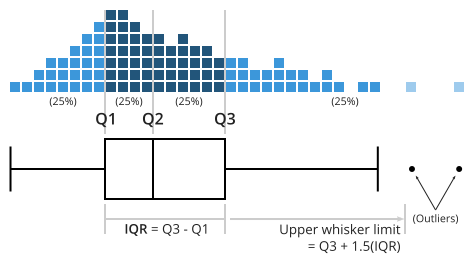

In [ ]:
def distribution_boxplots(df):
  df = df.select_dtypes(include='number')
  num_columns = df.shape[1]

  fig, axes = plt.subplots(1, num_columns, figsize=( num_columns * 3, 6))

  # If there's only one column, 'axes' is not an array
  if num_columns == 1:
      axes = [axes]

  for i, col in enumerate(df.columns):
      df.boxplot(column=col, ax=axes[i])
      axes[i].set_title(f'Boxplot for {col}')

  # prevent overlapping of plots and titles
  plt.tight_layout()

  plt.show()

In the following figure, we present the resulting boxplots. The boxplots reveal that the data covers a wide range, with a significant number of data points identified as outliers, lying outside the whiskers of the boxplots. For four of the features (excluding "volumes"), the box limits fall below 200, indicating that approximately 50% of the data values are less than 200. However, there is a substantial number of outliers, with values reaching as high as 1,600. For the column volume the situation is similar, the data range is just different.

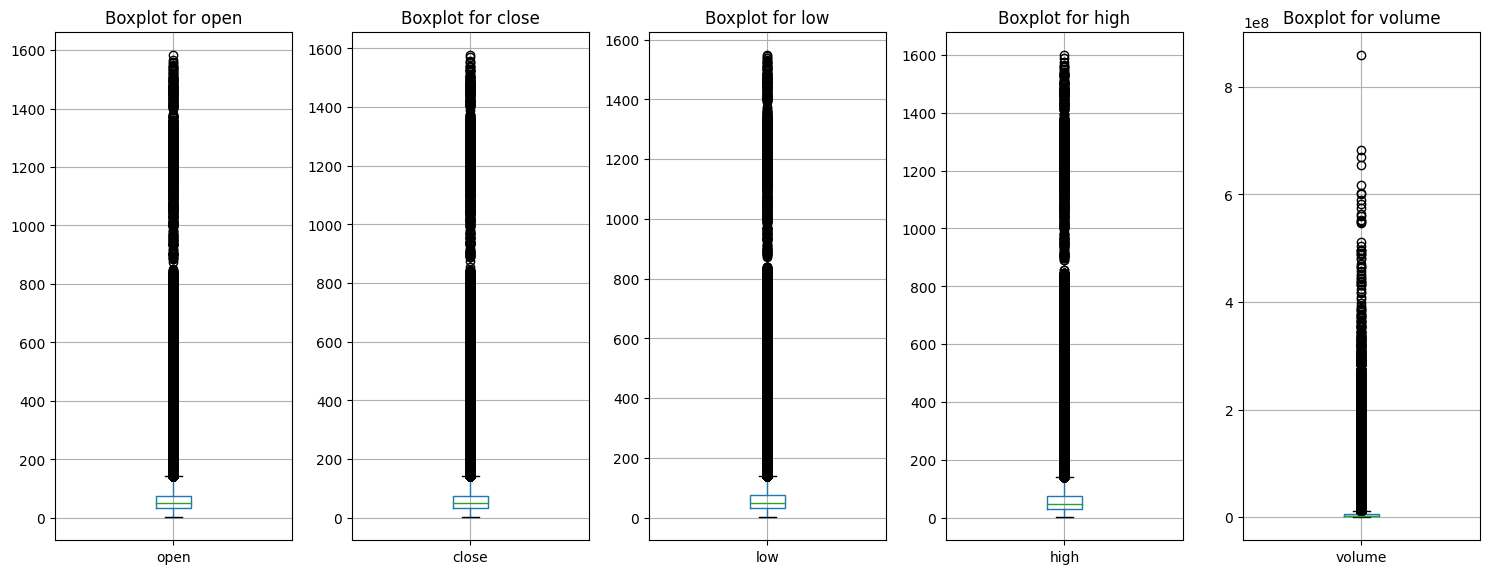

In [ ]:
distribution_boxplots(prices_split_adjusted)

To gain a better understanding of the data distribution, we can also look on the histograms. The histograms show bins up to a price of approximately 400, with the majority of data concentrated below 200. It is evident that there are no bins representing values above 400, indicating that while there are some data points in this range, they are isolated and not part of larger groups. Overall, the results from the histograms are consistent with those from the boxplots, providing a clearer visualization of the data distribution.

In [ ]:
def get_data_histogram(df):
    df = df.select_dtypes(include='number')
    num_columns = df.shape[1]

    fig, axes = plt.subplots(1, num_columns, figsize=(num_columns * 5, 4))

    # If there's only one numeric column, 'axes' is not an array
    if num_columns == 1:
        axes = [axes]

    for i, col in enumerate(df.columns):
        df[col].plot(kind='hist', ax=axes[i], bins=40, edgecolor='black')
        axes[i].set_title(f'Histogram for {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    # prevent overlapping of plots and titles
    plt.tight_layout()

    plt.show()


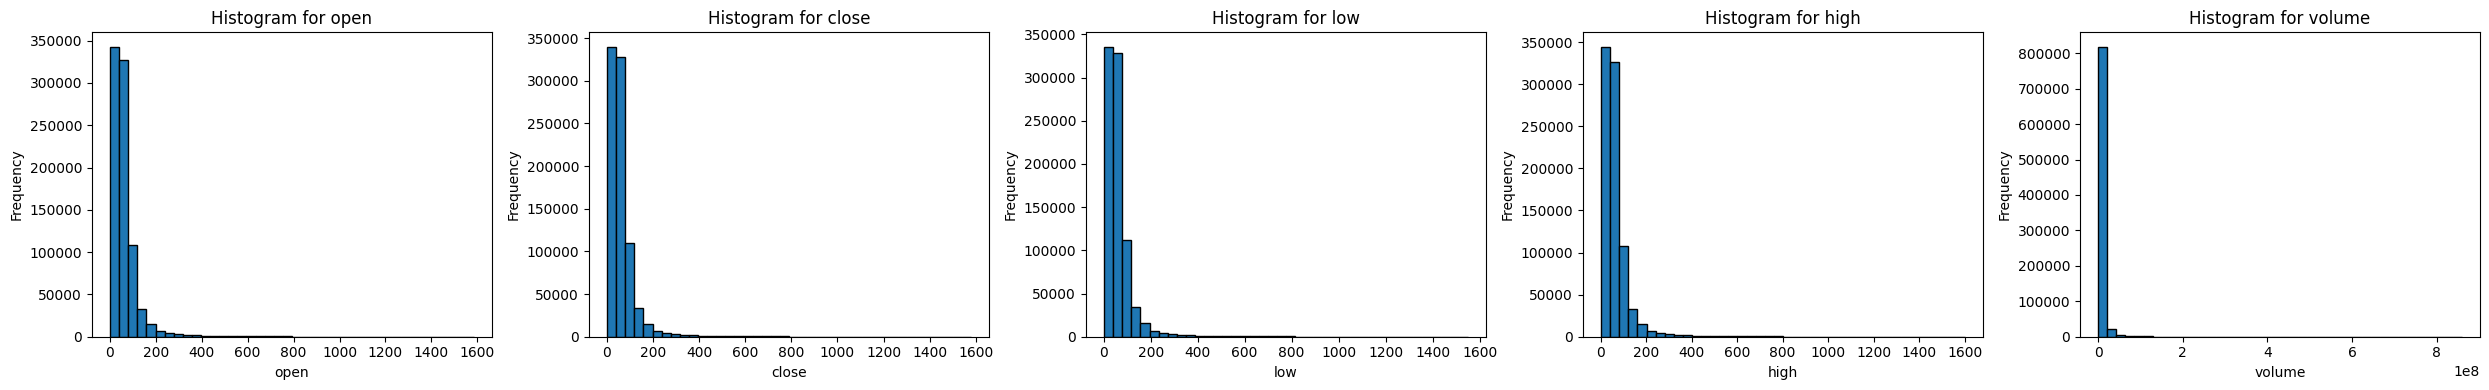

In [ ]:
get_data_histogram(prices_split_adjusted)

To better understand the data distribution, it may be useful to display how the data is divided among the quartiles, and discover how much outliers we have.

In [ ]:
import pandas as pd


def count_quartiles_and_outliers(df):
    df = df.select_dtypes(include='number').copy()
    quartile_counts = {}
    for col in df.select_dtypes(include='number').columns:

        Q1 = df[col].quantile(0.25)
        Q2 = df[col].quantile(0.50)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

      # Get amount of values in quartils and outliers
        quartiles = {
            'Q1 (<=Q1)': df[df[col] <= Q1][col].count(),
            'Q2 (Q1 < x <= Q2)': df[(df[col] > Q1) & (df[col] <= Q2)][col].count(),
            'Q3 (Q2 < x <= Q3)': df[(df[col] > Q2) & (df[col] <= Q3)][col].count(),
            'Q4 (>Q3)': df[df[col] > Q3][col].count(),
            'Outliers (< Q1 - 1.5*IQR or > Q3 + 1.5*IQR)': df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count(),
        }

        quartile_counts[col] = {
            'Q1': Q1,
            'Q2 (Median)': Q2,
            'Q3': Q3,
            'IQR': IQR,
            'Lower Bound for Outliers': lower_bound,
            'Upper Bound for Outliers': upper_bound,
            'Counts': quartiles
        }

    # Display results
    for col, stats in quartile_counts.items():
            print(f"--- {col} ---")
            print(f"Q1 (25th percentile): {stats['Q1']}")
            print(f"Q2 (50th percentile - Median): {stats['Q2 (Median)']}")
            print(f"Q3 (75th percentile): {stats['Q3']}")
            print(f"IQR (Q3 - Q1): {stats['IQR']}")
            print(f"Lower Bound for Outliers: {stats['Lower Bound for Outliers']}")
            print(f"Upper Bound for Outliers: {stats['Upper Bound for Outliers']}")

            print("\nCounts:")
            for key, count in stats['Counts'].items():
                print(f"  {key}: {count}")
            print("\n")



The following results clearly illustrate why the boxplot appeared as it did. The number of outliers for each category is quite similar, inspite of the volume where is a little bit higher, as detailed below:

|Column | Num of outliers |
|-------|----------|
| open| 51600 |
| close| 51585 |
| low| 51528 |
| high | 51606 |
| volume | 82488|

In [ ]:
count_quartiles_and_outliers(prices_split_adjusted)

--- open ---
Q1 (25th percentile): 31.27
Q2 (50th percentile - Median): 48.459999
Q3 (75th percentile): 75.120003
IQR (Q3 - Q1): 43.850003
Lower Bound for Outliers: -34.5050045
Upper Bound for Outliers: 140.8950075

Counts:
  Q1 (<=Q1): 212823
  Q2 (Q1 < x <= Q2): 212828
  Q3 (Q2 < x <= Q3): 212816
  Q4 (>Q3): 212797
  Outliers (< Q1 - 1.5*IQR or > Q3 + 1.5*IQR): 51600


--- close ---
Q1 (25th percentile): 31.2927756654
Q2 (50th percentile - Median): 48.48
Q3 (75th percentile): 75.139999
IQR (Q3 - Q1): 43.8472233346
Lower Bound for Outliers: -34.478059336499996
Upper Bound for Outliers: 140.9108340019

Counts:
  Q1 (<=Q1): 212817
  Q2 (Q1 < x <= Q2): 212871
  Q3 (Q2 < x <= Q3): 212776
  Q4 (>Q3): 212800
  Outliers (< Q1 - 1.5*IQR or > Q3 + 1.5*IQR): 51585


--- low ---
Q1 (25th percentile): 30.940001
Q2 (50th percentile - Median): 47.970001
Q3 (75th percentile): 74.400002
IQR (Q3 - Q1): 43.460001000000005
Lower Bound for Outliers: -34.25000050000001
Upper Bound for Outliers: 139.590003

The final function used in this section provides a summary of how many values fall within specified ranges. This information can be particularly interesting when comparing it to the histograms. For instance, it is useful to examine how many data points are not represented in the visible bins of the histogram but instead appear as individual values. The histogram indicates that values are visible up to approximately 400 (150000000 for volume), and the summary of intervals is presented in the following table.

|column| low limit| upper limit| under low limit| up upper limit| rest|
|------|----------|------------|----------------|---------------|-----|
|open| 0| 400| 0| 7368| 843 896|
|close| 0| 400| 0| 7373| 843 891|
|low| 0| 400| 0| 7232| 844 032|
|high| 0| 400| 0| 7498| 843 766|
|volume| 0| 150000000| 21| 1 068| 850175|



In [ ]:
def count_values_between_thresholds(df, columns=['open', 'close', 'low', 'high'],  lower_threshold=0, upper_threshold=400):
    threshold_counts = {}
    for col in columns:
        counts = {
            f'Values <= {lower_threshold}': df[df[col] <= lower_threshold][col].count(),
            f'Values between {lower_threshold} and {upper_threshold}': df[(df[col] > lower_threshold) & (df[col] <= upper_threshold)][col].count(),
            f'Values > {upper_threshold}': df[df[col] > upper_threshold][col].count(),
        }
        threshold_counts[col] = counts
    for col, counts in threshold_counts.items():
      print(f"--- {col} ---")
      for key, count in counts.items():
          print(f"  {key}: {count}")
      print("\n")

    return threshold_counts

In [ ]:
threshold_counts = count_values_between_thresholds(prices_split_adjusted)

--- open ---
  Values <= 0: 0
  Values between 0 and 400: 843896
  Values > 400: 7368


--- close ---
  Values <= 0: 0
  Values between 0 and 400: 843891
  Values > 400: 7373


--- low ---
  Values <= 0: 0
  Values between 0 and 400: 844032
  Values > 400: 7232


--- high ---
  Values <= 0: 0
  Values between 0 and 400: 843766
  Values > 400: 7498




In [ ]:
threshold_counts = count_values_between_thresholds(prices_split_adjusted, ['volume'],0, 150000000 )


--- volume ---
  Values <= 0: 21
  Values between 0 and 150000000: 850175
  Values > 150000000: 1068




We observe a similar pattern in the "fundamentals" dataset, where nearly all values exhibit a significant number of outliers, while the boxes of the boxplots cover only a small portion of the scale. The only exception is the "year" column, where all data points fall within a narrow range after the year 2000, with the exception of one outlier.

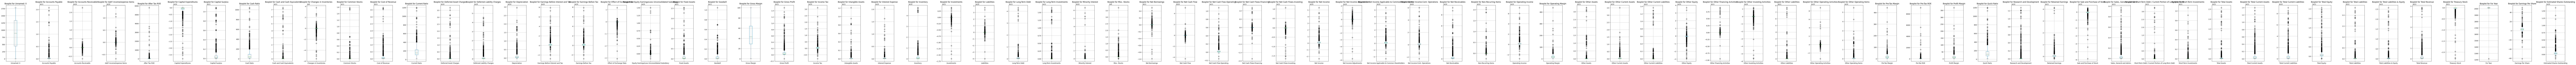

In [ ]:
distribution_boxplots(fundamentals)

## Data distribution

Another important question to consider is whether we have the same amount of data for each company, particularly in the "prices_split_adjusted" dataset. Also, it is worth investigating whether the data distribution is consistent across the years.

We began by checking the number of entries available for each year. The lowest number of entries per year is 117 500, while the highest is 126 125, with a difference of 8,625. This indicates that the number of entries varies slightly from year to year, but the difference is not significant.

In [ ]:
df = prices_split_adjusted.copy()
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
yearly_counts = df['year'].value_counts().sort_index()

print(yearly_counts)


year
2010    118138
2011    118440
2012    117500
2013    122624
2014    123480
2015    124957
2016    126125
Name: count, dtype: int64


Next, we checked the number of entries available for each company. Given the large number of companies, the most effective way to explore this is through a graph, which may not be perfectly readable but still provides a general sense of the data distribution.

As the graph shows, most companies have a similar or approximately similar number of entries. However, for a few companies, there is a noticeable decrease in the number of entries.

<ipython-input-34-a774ce7a2f6d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=company_counts.index, y=company_counts.values, palette='viridis')


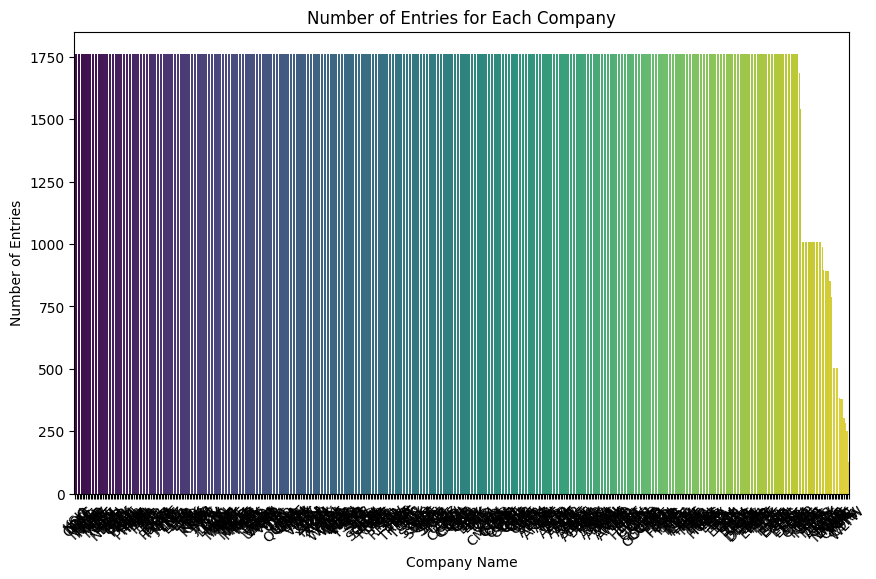

In [ ]:
company_counts = df['symbol'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=company_counts.index, y=company_counts.values, palette='viridis')
plt.title('Number of Entries for Each Company')
plt.xlabel('Company Name')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.show()


Given this insights, it may be helpful to determine how many companies have the maximum number of entries and how many have fewer entries.

The results show that the maximum number of entries is 1,762, and 462 companies meet this criterion. On the other hand, 34 companies have fewer entries.

In [ ]:
company_counts = df['symbol'].value_counts()

max_count = company_counts.max()
max_count_companies = (company_counts == max_count).sum()

smaller_count_companies = (company_counts < max_count).sum()

print(f'Maximum entry count: {max_count}')
print(f'Number of companies with maximum entries: {max_count_companies}')
print(f'Number of companies with smaller amounts of entries: {smaller_count_companies}')


Maximum entry count: 1762
Number of companies with maximum entries: 467
Number of companies with smaller amounts of entries: 34


Next, we look on in greater detail how many entries are missing for the companies that did not meet the condition for the maximum number of entries. When displaying this information in a graph, we can observe variations in the number of entries for these companies as well. While some companies have only slightly fewer entries (e.g., 1,761), 18 different companies have fewer than 1,000 entries and the lowest one has just 126 entries.

Companies with fewer entries than the maximum (1762):
CHTR: 1761
LYB: 1683
GM: 1540
TRIP: 1008
KORS: 1008
XYL: 1008
PSX: 1008
NLSN: 1008
MPC: 1008
TDG: 1008
KMI: 1008
FBHS: 1008
FB: 1008
HCA: 1008
DLPH: 1008
ABBV: 1008
ZTS: 987
COTY: 896
MNK: 894
NWS: 892
NWSA: 892
EVHC: 853
ALLE: 786
CFG: 504
NAVI: 504
QRVO: 504
SYF: 504
WRK: 385
PYPL: 378
KHC: 378
HPE: 304
CSRA: 284
WLTW: 251
FTV: 126


<ipython-input-52-2dbac57c9db4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fewer_entries.index, y=fewer_entries.values, palette='coolwarm')


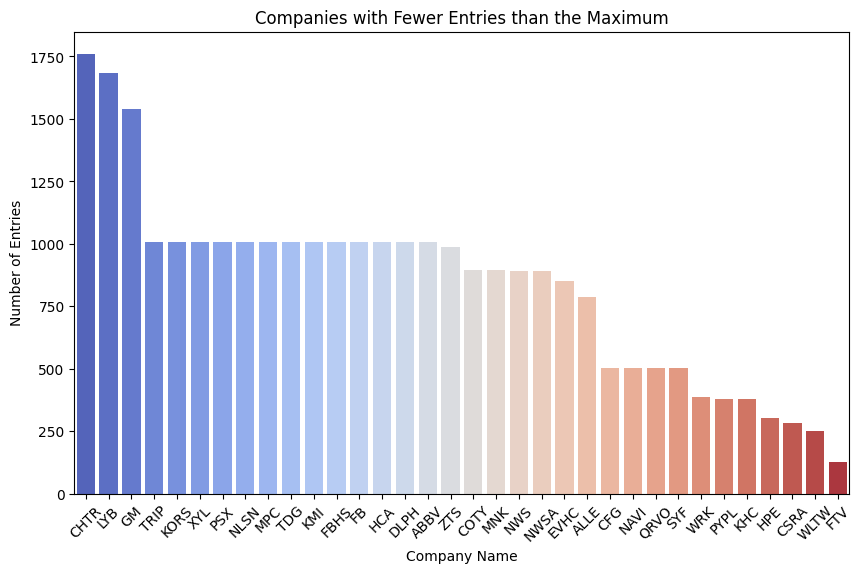

In [ ]:
company_counts = df['symbol'].value_counts()
fewer_entries = company_counts[company_counts < max_count]

print(f'Companies with fewer entries than the maximum ({max_count}):')
for company, count in fewer_entries.items():
    print(f'{company}: {count}')

plt.figure(figsize=(10, 6))
sns.barplot(x=fewer_entries.index, y=fewer_entries.values, palette='coolwarm')
plt.title('Companies with Fewer Entries than the Maximum')
plt.xlabel('Company Name')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.show()

When we checked how many different companies were recorded each year, we observe an obvious trend of increasing numbers over time. For instance, between 2016 and 2018, the number of companies increased by 31. From the earlier analysis, we noted that 31 companies have a significantly smaller number of entries (around 1,000 or fewer), which might be related.

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.yearinquiry
companies_count_by_year = df.groupby('year')['symbol'].nunique()
print(companies_count_by_year)

year
2010    470
2011    470
2012    470
2013    490
2014    490
2015    499
2016    501
Name: symbol, dtype: int64


As part of this analysis, we also checked how many companies have entries for every year. The results show that 470 companies have an entry for each year.

In [ ]:
df['date'] = pd.to_datetime(df['date'])

    # Step 2: Extract the year from the date
df['year'] = df['date'].dt.year

    # Step 3: Group by year and count unique companies
companies_count_by_year = df.groupby('symbol')['year'].nunique()
companies_count_by_year

filtered = companies_count_by_year[companies_count_by_year == 7].count()
print(filtered)

470


Another interesting insight can be gained by examining how many entries companies have per year. Typically, we observe around 252 entries per year, with the exception of 2012, which shows approximately 250 entries. Based on these observations, we can assess how many companies have fewer than 250 entries each year. This trend is most visible in 2013, where 7 companies had fewer than 250 entries.

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

unique_dates_count = df.groupby(['symbol', 'year'])['date'].nunique().reset_index()

pivot_table = unique_dates_count.pivot(index='year', columns='symbol', values='date').fillna(0)

print(pivot_table)

symbol      A    AAL    AAP   AAPL   ABBV    ABC    ABT    ACN   ADBE    ADI  \
year                                                                           
2010    252.0  252.0  252.0  252.0    0.0  252.0  252.0  252.0  252.0  252.0   
2011    252.0  252.0  252.0  252.0    0.0  252.0  252.0  252.0  252.0  252.0   
2012    250.0  250.0  250.0  250.0    0.0  250.0  250.0  250.0  250.0  250.0   
2013    252.0  252.0  252.0  252.0  252.0  252.0  252.0  252.0  252.0  252.0   
2014    252.0  252.0  252.0  252.0  252.0  252.0  252.0  252.0  252.0  252.0   
2015    252.0  252.0  252.0  252.0  252.0  252.0  252.0  252.0  252.0  252.0   
2016    252.0  252.0  252.0  252.0  252.0  252.0  252.0  252.0  252.0  252.0   

symbol  ...   XLNX    XOM   XRAY    XRX    XYL   YHOO    YUM    ZBH   ZION  \
year    ...                                                                  
2010    ...  252.0  252.0  252.0  252.0    0.0  252.0  252.0  252.0  252.0   
2011    ...  252.0  252.0  252.0  252.0    0.

In [ ]:
entries_count = df.groupby(['symbol', 'year']).size().reset_index(name='entries')

less_than_250 = entries_count[entries_count['entries'] < 250]
companies_count = less_than_250.groupby('year')['symbol'].nunique().reset_index()

print("\nNumber of Companies with Less Than 250 Entries per Year:")
print(companies_count)


Number of Companies with Less Than 250 Entries per Year:
   year  symbol
0  2010       2
1  2013       7
2  2015       5
3  2016       1


### What companies do we have?

As mentioned in the dataset description, the files contain stock prices for various companies. Let’s explore this in more detail.

Firstly, we will compare the number of different companies represented. According to the "securities" file, which includes basic descriptions of 505 different companies, we indeed have 505 unique companies. However, upon examining the next two datasets, we find that the "prices_split_adjusted" dataset contains only 501 unique entries for the company name, while the "fundamentals" dataset has only 448 entries. This discrepancy suggests that there is a varying amount of information available for different companies.

If we decide to use all three datasets and combine them, we must consider how to handle the missing values.






In [ ]:
print(securities.shape)
print(securities['Ticker symbol'].nunique()) # get unique values for given column

(505, 8)
505


In [ ]:
prices_split_adjusted
print(prices_split_adjusted['symbol'].nunique()) # get unique values for given column

501


In [ ]:
fundamentals.shape
print(fundamentals['Ticker Symbol'].nunique()) # get unique values for given column

448


#### How many industries we have? How many subindustries?

Another important piece of information from the "securities" dataset is the number of different companies and how they are distributed across various industries.

We observe that there are 11 different industries represented, but the distribution of companies among these industries is imbalanced. For instance, there are 85 companies in the Consumer Discretionary sector, while the Telecommunications Services sector has only 5 companies.


In [ ]:
securities.groupby('GICS Sector')['Ticker symbol'].count()

,Ticker symbol
GICS Sector,
Consumer Discretionary,85
Consumer Staples,37
Energy,36
Financials,64
Health Care,59
Industrials,69
Information Technology,68
Materials,25
Real Estate,29


We can also go deeper to get the number of different sub-industries represented in the dataset, which is 124 in total. The distribution of companies among these sub-industries is also imbalanced. For example, the "Industrial Conglomerates" sub-industry has 21 companies, the highest number in the dataset. In contrast, many sub-industries are represented by only a single company.

In [ ]:
securities.groupby('GICS Sub Industry')['Ticker symbol'].count().sort_values(ascending=False)

,Ticker symbol
GICS Sub Industry,
Industrial Conglomerates,21
Internet Software & Services,20
Oil & Gas Exploration & Production,18
Health Care Equipment,17
REITs,16
...,...
Home Furnishings,1
Human Resource & Employment Services,1
Industrial Materials,1


## Summary

During this exploratory analysis, we went through various aspects of the dataset. Firstly, we checked each of the files to understand their size and the included data types. We discovered that most of the variables are numerical characters.

Next, we identified multiple columns with missing values but found no duplicates in the dataset.

The next objective of our exploration was to investigate outliers. We found that there are numerous outliers in our dataset, whereas a significant number of values appearing at the beginning of the value range. This was followed by the identification of thousands of different outliers. To gain a better understanding of the data distribution, we checked the boundaries for the quartiles and analyze how many different values they encompass using the Interquartile Range (IQR).

In the following step, we assessed the imbalances within the dataset. We discovered that there are approximately the same number of entries per year. Additionally, while most companies have a similar number of entries, some companies have fewer entries, particularly those that were not present at the beginning of the analysis. The lowest number of entries significantly differs from the highest number.

In the final part of our analysis, we focused on the industries represented by the companies and found that not all companies are mentioned in each file of the dataset.

Based on the results of the analysis, we suggest the following steps for data preprocessing:
* renanming the columns - inconsistent names through dataset ( 'Ticker symbol' x 'symbol')
* scaling the values, as they cover huge range
* solving missing values
* think about imbalances in the dataset
* defining and handling outliers
* check that all companies we will use are consistently represented across files